In [1]:
import datetime
import csv
import pickle
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import os #システム操作系
from pathlib import Path #ファイル操作系
from createdatas3 import intensity, gaussian_beam
from scipy.optimize import curve_fit    # フィッティング用
from scipy.stats import norm

In [2]:
# グラフの初期設定
plt.rcParams["figure.figsize"] = [3.14, 3.14] # 図の縦横のサイズ([横(inch),縦(inch)])
plt.rcParams["figure.dpi"] = 200 # dpi(dots per inch)
plt.rcParams["figure.facecolor"] = 'white' # 図の背景色
plt.rcParams["figure.edgecolor"] = 'black' # 枠線の色
plt.rcParams["font.family"] = "serif"       # 使用するフォント
plt.rcParams["font.serif"] = "Times New Roman"
plt.rcParams["font.size"] = 14              # 基本となるフォントの大きさ

plt.rcParams["xtick.direction"] = "in"      # 目盛り線の向き、内側"in"か外側"out"かその両方"inout"か
plt.rcParams["ytick.direction"] = "in"      # 目盛り線の向き、内側"in"か外側"out"かその両方"inout"か
plt.rcParams["xtick.bottom"] = True         # 下部に目盛り線を描くかどうか
plt.rcParams["ytick.left"] = True           # 左部に目盛り線を描くかどうか
plt.rcParams["xtick.major.size"] = 2.0      # x軸主目盛り線の長さ
plt.rcParams["ytick.major.size"] = 2.0      # y軸主目盛り線の長さ
plt.rcParams["xtick.major.width"] = 0.3     # x軸主目盛り線の線幅
plt.rcParams["ytick.major.width"] = 0.3     # y軸主目盛り線の線幅
plt.rcParams["xtick.minor.visible"] = False # x軸副目盛り線を描くかどうか
plt.rcParams["ytick.minor.visible"] = False # y軸副目盛り線を描くかどうか
plt.rcParams["xtick.minor.size"] = 2.0      # x軸副目盛り線の長さ
plt.rcParams["ytick.minor.size"] = 2.0      # y軸副目盛り線の長さ
plt.rcParams["xtick.minor.width"] = 0.3     # x軸副目盛り線の線幅
plt.rcParams["ytick.minor.width"] = 0.3     # y軸副目盛り線の線幅
plt.rcParams["xtick.labelsize"] = 8        # 目盛りのフォントサイズ
plt.rcParams["ytick.labelsize"] = 8        # 目盛りのフォントサイズ
plt.rcParams["xtick.major.pad"] = 3.0      # x軸から目盛までの距離
plt.rcParams["ytick.major.pad"] = 4.0      # y軸から目盛までの距離

plt.rcParams["axes.labelsize"] = 10         # 軸ラベルのフォントサイズ
plt.rcParams["axes.linewidth"] = 0.4        # グラフ囲う線の太さ
plt.rcParams["axes.grid"] = False           # グリッドを表示するかどうか

In [3]:
#実験データ読み込み
NUMBER = 1
data_size_x = 45
data_size_y = 50
experiments = np.zeros((data_size_x, data_size_y))
data_path = f'/Users/nagaiyuma/Desktop/maindata/201209/ひろえ.csv'
print(data_path)
with open(data_path) as f:
    reader = csv.reader(f, quoting=csv.QUOTE_NONNUMERIC)
    experiments = np.array([row for row in reader])

/Users/nagaiyuma/Desktop/maindata/201209/ひろえ.csv


In [4]:
# このファイルの存在するフォルダの絶対パスを取得
dir_name = str(Path().resolve())
print('このファイルの存在するフォルダ：', dir_name)

# 保存先フォルダのパス作成
save_folder = os.path.join(dir_name, 'hiroe')
print('保存フォルダ：', save_folder)

# 保存先フォルダの作成(既に存在する場合は無視される)
os.makedirs(save_folder, exist_ok=True)

このファイルの存在するフォルダ： /Users/nagaiyuma/Documents/myprogram
保存フォルダ： /Users/nagaiyuma/Documents/myprogram/hiroe


現在時刻： 2020-12-09 17:20:09.564846


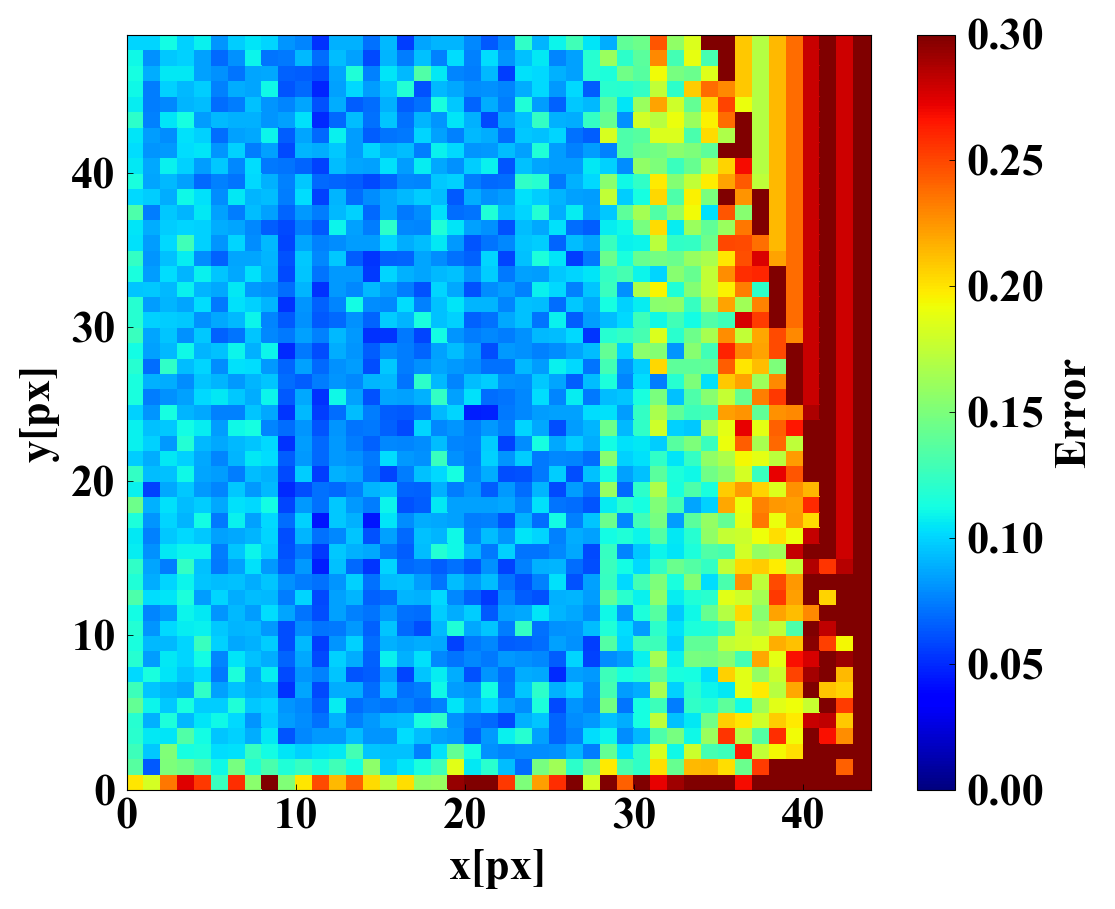

保存ファイル名： 2020-12-09_17-20_hiroe_jet.png
保存ファイルパス： /Users/nagaiyuma/Documents/myprogram/hiroe/2020-12-09_17-20_hiroe_jet.png


In [13]:
dt_now = datetime.datetime.now()
print('現在時刻：', dt_now)

xexp_array = range(experiments.shape[0])
yexp_array = range(experiments.shape[1])
xexp_grid, yexp_grid = np.meshgrid(xexp_array, yexp_array)

#全面カラーマップ表示
save_name = dt_now.strftime("%Y-%m-%d_%H-%M") +'_hiroe_jet.png'
save_file = os.path.join(save_folder, save_name) # 保存先のファイルパス作成
fig = plt.figure(figsize=(6,5))
ax = fig.add_subplot(111)
ax.set_xlabel("x[px]", fontsize=16)
ax.set_ylabel("y[px]", fontsize=16)
ax.tick_params(labelsize=16)
mappable = ax.pcolormesh(xexp_grid.T, yexp_grid.T, experiments, cmap='jet', vmin=0.0, vmax=0.3)
cbar = fig.colorbar(mappable, ax=ax)
cbar.set_label("Error", fontsize=16)
cbar.ax.tick_params(labelsize=16)
fig.savefig(save_file)
plt.show()
print('保存ファイル名：', save_name)
print('保存ファイルパス：', save_file)